In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
import pickle as pk

In [168]:
subject = 'sub-02'
file_model = f'{subject}dataset-friends_tasks-s01_cluster-20_states-60_batches-3_reps-100.pickle'
pickle_in = open(file_model, "rb")
model = pk.load(pickle_in)
pickle_in.close()

In [164]:
model.components_.shape

(60, 131466)

# Interactive viewer

/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



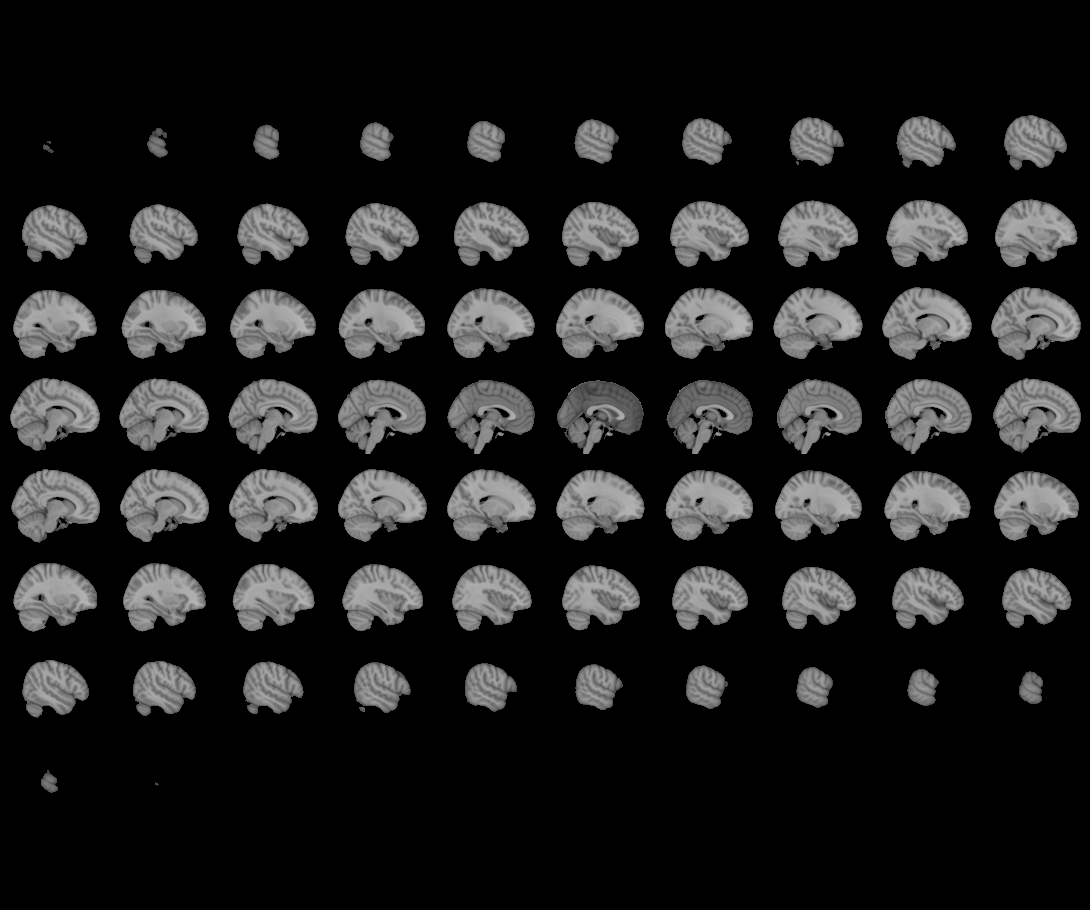
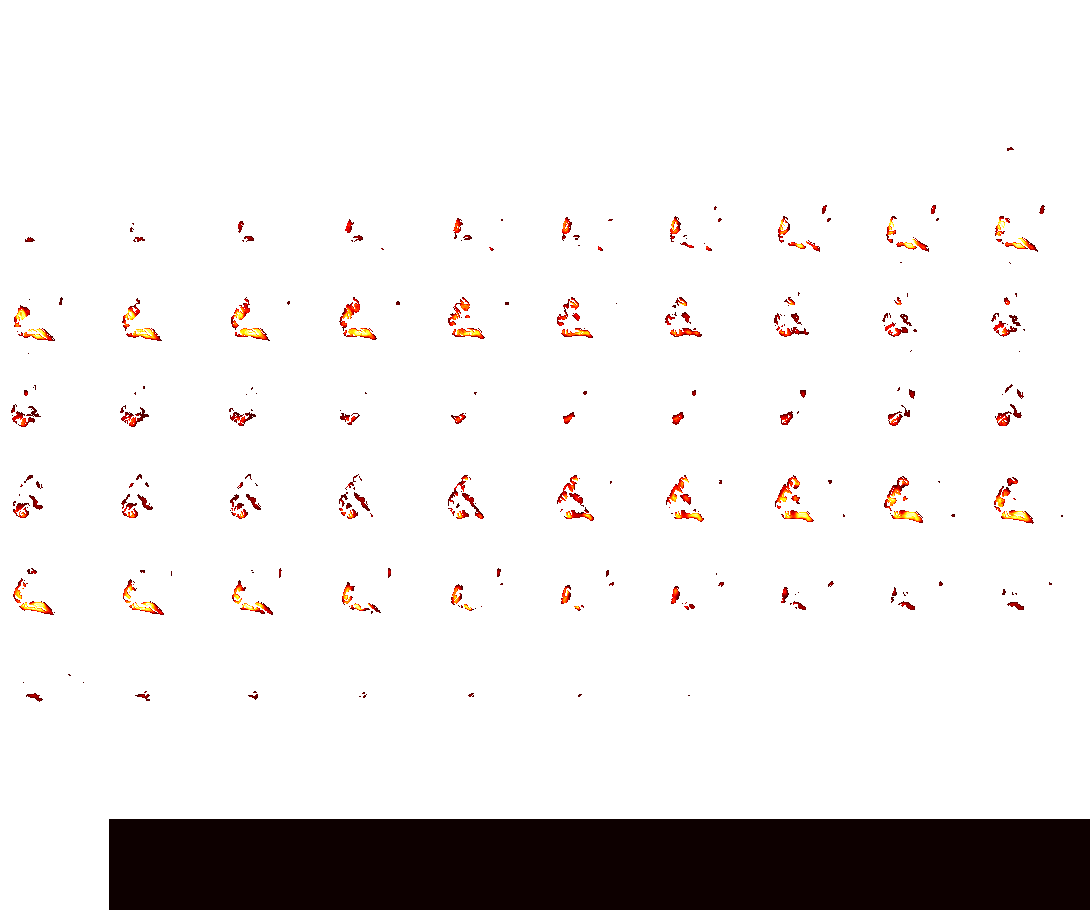

In [146]:
num_comp = 15
comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
plotting.view_img(comp, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

# Slice viewer

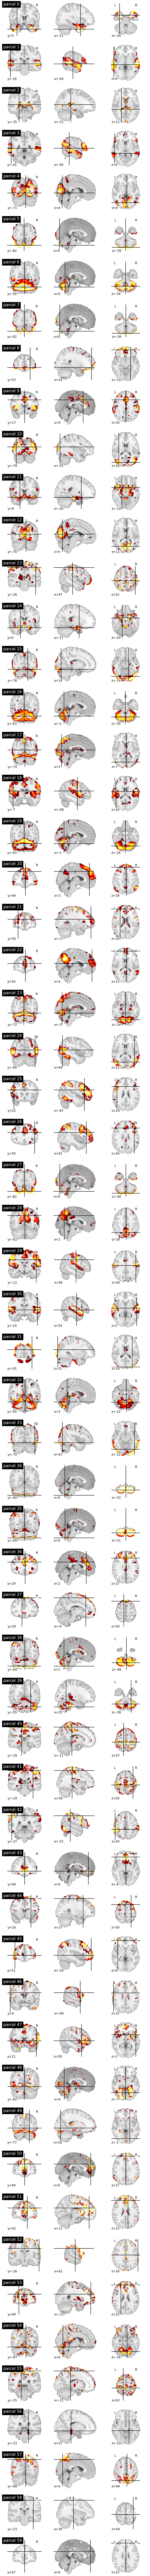

In [169]:
from nilearn.plotting import plot_stat_map
n_comp = 60
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))

for num_comp in range(0, n_comp):
    comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
    plotting.plot_stat_map(comp, display_mode='ortho', axes=plt.subplot(n_comp, 1, num_comp + 1), threshold=0.1, vmax=1, title=f"parcel {num_comp}", colorbar=False)